# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
#first look
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [5]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

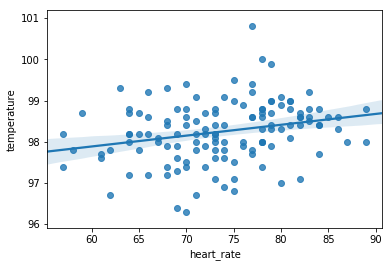

In [6]:
# heart rate vs temperature

sns.regplot('heart_rate','temperature', data=df)
plt.show()

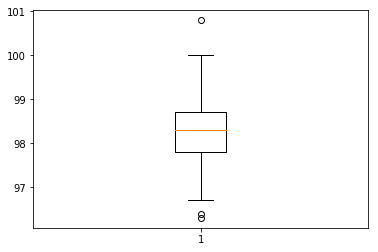

In [7]:
#Observe range of temperatures 
plt.boxplot(df['temperature'])
plt.show()

C:\Users\cct51\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


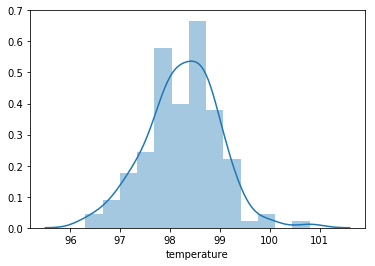

In [22]:
#This histogram of temperature vs. frequency illustrates that the distribution is relatively normal.

body_temp = df['temperature']
sns.distplot(body_temp)

In [8]:
#Calculate mean and median values. It looks like these temperatures are a little lower than "98.6"
print(np.mean(df['temperature']), np.median(df['temperature']))

98.24923076923078 98.3


In [9]:
#Create ECDF
def ecdf(data): 
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

y_temp, x_temp = ecdf(df['temperature'])
print(y_temp)

[ 96.3  96.4  96.7  96.7  96.8  96.9  97.   97.1  97.1  97.1  97.2  97.2
  97.2  97.3  97.4  97.4  97.4  97.4  97.4  97.5  97.5  97.6  97.6  97.6
  97.6  97.7  97.7  97.7  97.8  97.8  97.8  97.8  97.8  97.8  97.8  97.9
  97.9  97.9  97.9  97.9  98.   98.   98.   98.   98.   98.   98.   98.
  98.   98.   98.   98.1  98.1  98.1  98.2  98.2  98.2  98.2  98.2  98.2
  98.2  98.2  98.2  98.2  98.3  98.3  98.3  98.3  98.3  98.4  98.4  98.4
  98.4  98.4  98.4  98.4  98.4  98.4  98.5  98.5  98.5  98.6  98.6  98.6
  98.6  98.6  98.6  98.6  98.6  98.6  98.6  98.7  98.7  98.7  98.7  98.7
  98.7  98.7  98.7  98.8  98.8  98.8  98.8  98.8  98.8  98.8  98.8  98.8
  98.8  98.9  98.9  99.   99.   99.   99.   99.   99.1  99.1  99.1  99.2
  99.2  99.2  99.3  99.3  99.4  99.4  99.5  99.9 100.  100.8]


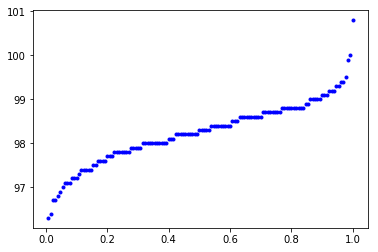

In [10]:
#Q1. Is the distribution of body temperatures normal?

#Based on the ecdf alone, the distribution seems to follow a normal curve -> though especially drawn out in the middle section, 
#meaning there are not too many values in the middle of the bulge.

plt.plot(x_temp, y_temp, marker = '.', linestyle='none', color='blue')
plt.show()

In [11]:
#Q2. Is the sample size large? Are the observations independent?
#Q2. Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

#Based on the head of the data and the "info" obtained earlier, it appears that the samples taken are all individual, independent
#trials. The sample size of the data is 130, which is not huge but should suffice for our analysis. 

df.head(100)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


In [12]:
#Q3.Is the true population mean really 98.6 degrees F?
#Q3.Would you use a one-sample or two-sample test? Why?
#Q3.In this situation, is it appropriate to use the  t  or  z  statistic?

#I would use a one-sample test because we have an established mean of 98.6F and an array of values to compare against. 
#The t statistic is appropriate considering the data are not completely normally distributed 

temp_mean = np.mean(df['temperature'])
#np.std(df['temperature'])
#print(df.temperature)
#print(translated_temps)
print(temp_mean)

98.24923076923078


In [13]:

#First step - translate temps to mean of 98.6#First s 
translated_temps = df.temperature + .35

#Prepare bootstrapping functions

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))


def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [14]:
#1-sample Bootstrapped T-test returns a p value of 0! None of the modified values are less than our experimental mean. 
#this is not looking good for the 98.6F standard, considering observed values are this closely packed.

temp_reps = draw_bs_reps(translated_temps, np.mean, 10000)
print(temp_reps)
p = np.sum(temp_reps <= np.mean(df.temperature)) / 10000
print('p = ', p)

#A common-sense check to see that even the lowest value obtained is significantly apart from the mean. 

print(np.min(df['temperature']))

[98.60615385 98.59461538 98.60692308 ... 98.61384615 98.53076923
 98.54692308]
p =  0.0
96.3


In [17]:
#Taking 10 random numbers and doing it again
#Better to use the t statistic for smaller sample sizes, and z statistic for the larger sample size.
import random

random_10_temps = random.sample(list(df['temperature']), 10)



translated_temps = random_10_temps + (98.6 - np.mean(random_10_temps))


temp_reps = draw_bs_reps(translated_temps, np.mean, 10000)
print(temp_reps)
p = np.sum(temp_reps <= np.mean(df.temperature)) / 10000
print('p = ', p)


#The p value tends to be much greater when using only the random 10 values and performing bootstrapping, suggesting that larger
#data sizes and the resulting z statistic lead to greater statistical confidence.

[98.75 98.81 98.5  ... 98.66 98.22 99.33]
p =  0.081


In [18]:
#What is the range of normality?
#I'll use the 95% confidence interval to answer this question. Let's go back and do another bootstrap on the original data

temps = list(df.temperature)
temp_reps_2 = draw_bs_reps(temps, np.mean, 10000)
conf_int = np.percentile(temp_reps_2, [2.5, 97.5])
print(conf_int)

#It appears that a temperature ranging from 98.1 to 98.4 should be suffice to call normal 95% of the time.

[98.12538462 98.37307692]


In [25]:
#Test between males and females. Shortcut 2-sample bootstrapped t-test

import scipy.stats as stats

temp_gender_df = df[['temperature', 'gender']]
male_temp = temp_gender_df[temp_gender_df.gender=='M']
female_temp = temp_gender_df[temp_gender_df.gender=='F']
stats.ttest_ind(male_temp['temperature'],female_temp['temperature'])

#A p-value of 0.024 suggests that these stats are significantly different

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

C:\Users\cct51\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\cct51\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


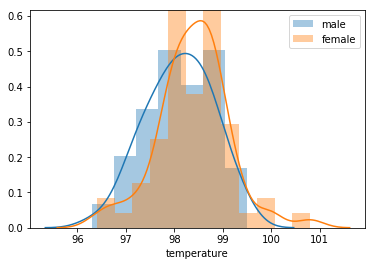

In [26]:
#This distribution plot illustrates that females tend to be warmer than males.
#Fascinating!

sns.distplot(male_temp['temperature'], label='male')
sns.distplot(female_temp['temperature'], label='female')
plt.legend()

In [20]:
#Our results indicate that the fabled and historical 98.6F average body temp. is, in fact, inconsistent with more recent and 
#more accurate findings. The new average to work with is 98.25, where a normal measurement can range anywhere from 98.1 to 98.4F 
#Further testing indicates that men and women both are likely to center around this 'new norm', with no real significant 
#difference between the genders based on our research.